In [ ]:
#modelli non parametrici

In [ ]:
#X = features, y = target

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# impostazione per vedere tutte le colonno di un DataFrame
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.shape

(1460, 81)

TRAIN / TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

FEATURES

In [ ]:
features = ['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','TotRmsAbvGrd']

X_train = train_df[features].copy()
y_train = train_df['SalePrice'].copy()

X_test = test_df[features].copy()
y_test = test_df['SalePrice'].copy()

In [ ]:
### definisco già prima la funzione di evaluation

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:                 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

# K-NEAREST NEIGHBORS (KNN)

> Blocco con rientro

> Blocco con rientro





> Blocco con rientro



In [ ]:
#K-nearest neighbors (k-NN) -> prendo una x, prendo i k (valori) più vicini ad 
#una retta, prendo le y e faccio la MEDIA
#ripeto per tutti i valori di X, connetto le medie trovate. 
#molto più complesso della regressione lineare. peculiarità di poter vedere dati 
#non lineari.

#k = 1 -> probabile OVERFITTING
#k = 10 -> curva più smooth 
#se arriva un dato nuovo è più probabile che sia vicino alla retta della seconda 
#k, non della prima.

#IPER-PARAMETRI DEL MODELLO
#K: numero dei vicini
#Distance metric: tipicamente una distanza euclidea
#Weights: volendo posso pesare la media sulla distanza dei singoli punti 
#(ad es in base alla distaanza che hanno dalla retta)

#CONTRO: non è interpretabile come può essere la regressione lineare.

#come trovare il k? si fanno delle prove.

In [ ]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor  
 
model = KNeighborsRegressor()           #k di default è uguale a 5
model = model.fit(X_train, y_train)

TRAIN SET
MAE:  25529.214977168947
R2:  0.7423970343125464


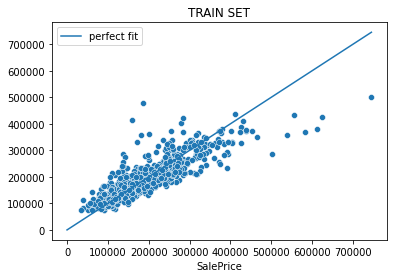

TEST SET
MAE:  30272.47835616438
R2:  0.7003914359322968


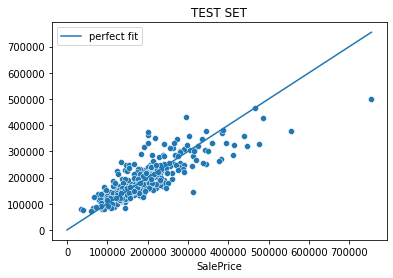

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### K parameter

Facciamo un ciclo cambiando il valore di K, cioè il numero di vicini da considerare

In [ ]:
### esempio FITTING con k modificato
from sklearn.neighbors import KNeighborsRegressor  
 
model = KNeighborsRegressor(n_neighbors=1)           #k di default è uguale a 5
model = model.fit(X_train, y_train)

TRAIN SET
MAE:  506.68036529680364
R2:  0.9975587315702826


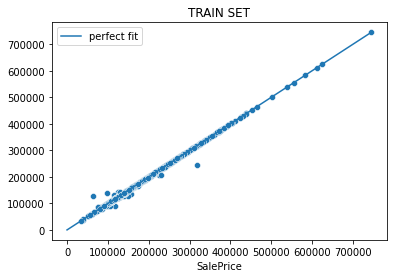

TEST SET
MAE:  38262.098630136985
R2:  0.4842343957584131


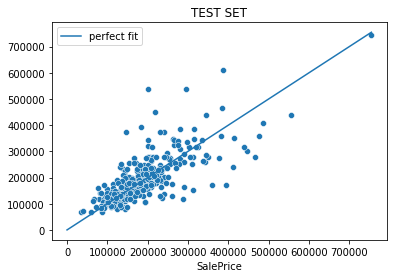

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

In [ ]:
#OVERFITTING

In [ ]:
#PROCESSO DI TUNING DI K:

In [ ]:
train_r2_list = list()
test_r2_list = list()

k_list = range(1, 20)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]
        


K: 1
TRAIN SET
MAE:  506.68036529680364
R2:  0.9975587315702826
TEST SET
MAE:  38262.098630136985
R2:  0.4842343957584131

K: 2
TRAIN SET
MAE:  19061.250228310502
R2:  0.8465182499600759
TEST SET
MAE:  34052.68630136986
R2:  0.6191873930800547

K: 3
TRAIN SET
MAE:  22180.849923896498
R2:  0.8103041906953443
TEST SET
MAE:  31751.20639269406
R2:  0.671179129203024

K: 4
TRAIN SET
MAE:  24231.688584474887
R2:  0.7710010420981998
TEST SET
MAE:  31408.267808219178
R2:  0.6818124109857351

K: 5
TRAIN SET
MAE:  25529.214977168947
R2:  0.7423970343125464
TEST SET
MAE:  30272.47835616438
R2:  0.7003914359322968

K: 6
TRAIN SET
MAE:  26579.28310502283
R2:  0.720090615029914
TEST SET
MAE:  30184.363926940638
R2:  0.7104060239193244

K: 7
TRAIN SET
MAE:  26918.622048271365
R2:  0.7141300087490084
TEST SET
MAE:  30203.67671232877
R2:  0.6965336655472593

K: 8
TRAIN SET
MAE:  27113.825799086757
R2:  0.7151887200219603
TEST SET
MAE:  30303.369863013697
R2:  0.6915401858904412

K: 9
TRAIN SET
MAE:  2

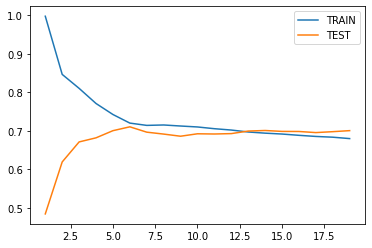

In [ ]:
plt.plot(k_list, train_r2_list, label='TRAIN')
plt.plot(k_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

In [ ]:
#pian piano l'OVERFITTING diminuisce perchè la differenza tra TRAIN SET e TEST SET diminuisce.
#l'r2 più alto è con k più o meno = 6 -> c'è la previsione migliore.

Si vede bene per k<5 c'è un forte overfitting, in quanto il modello performa benissimo sul train set e male sul test set. Da 5 in poi l'overfitting scompare, a discapito però della performance assoluta, che decresce lentamente

### Features scaling

In [ ]:
#Questo modello è molto influenzabile dalla SCALA DELLE VARIABILI. le x possono avere delle scale molto diverse tra loro.
#le Features con valori più alti hanno un peso molto maggiore per trovare le k

Un aspetto che può influenzare fortemente la bontà delle previsioni del k-NN sono le diverse scale a cui si presentano le varie features. Per esempio è evidente che la superficie di un piano non è paragonabile con il numero di macchine del garage.

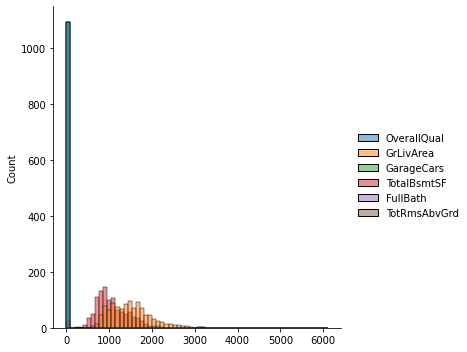

In [ ]:
sns.displot(X_train)
plt.show()

In [ ]:
#per normalizzare si usano gli SCALER (ad es MinMaxScaler o StandardScaler)

Per questo motivo si usa normalizzare i dati

#### MinMaxScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)     #funzione scaler.fit_trasform -> vede i min e max di ogni feature e li trasforma da 0 a 1 su x train
X_test_scaled = scaler.transform(X_test)            #devo fare TRASFORM su x test, perchè ho già fittato prima (nel test è già fittato)

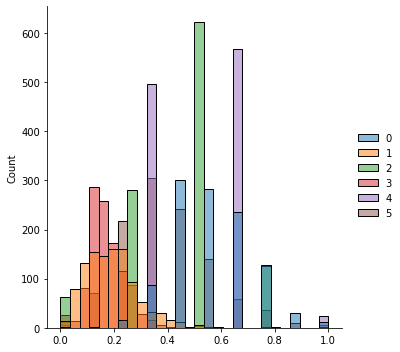

In [ ]:
sns.displot(X_train_scaled)
plt.show()

In [ ]:
#adesso non arriva più fino a 3000, ma va sa 0 a 1

In [ ]:
X_train_scaled

array([[0.55555556, 0.06716127, 0.25      , 0.14140753, 0.33333333,
        0.11111111],
       [0.44444444, 0.07262788, 0.25      , 0.14140753, 0.33333333,
        0.22222222],
       [0.55555556, 0.33365873, 0.        , 0.12356792, 0.33333333,
        0.55555556],
       ...,
       [0.44444444, 0.10230379, 0.5       , 0.08837971, 0.33333333,
        0.11111111],
       [0.44444444, 0.15755564, 0.5       , 0.17397709, 0.33333333,
        0.44444444],
       [0.88888889, 0.23213588, 0.5       , 0.27790507, 0.66666667,
        0.22222222]])

In [ ]:
#lo scaler mi restituisce un np.array, quindi possiamo trasformarlo in un DataFrame per renderlo più leggibile.
#prendo l'array e gli dico quali sono i nomi delle colonne.

In [ ]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)     #per vedere il DataFrame

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd
0,0.555556,0.067161,0.25,0.141408,0.333333,0.111111
1,0.444444,0.072628,0.25,0.141408,0.333333,0.222222
2,0.555556,0.333659,0.00,0.123568,0.333333,0.555556
3,0.555556,0.131589,0.25,0.195417,0.333333,0.333333
4,0.555556,0.217688,0.25,0.079378,0.333333,0.222222
...,...,...,...,...,...,...
1090,0.555556,0.126318,0.50,0.189525,0.666667,0.333333
1091,0.444444,0.065990,0.00,0.140426,0.333333,0.111111
1092,0.444444,0.102304,0.50,0.088380,0.333333,0.111111
1093,0.444444,0.157556,0.50,0.173977,0.333333,0.444444


Si sono persi i nomi delle feature perchè lo scaler dà in output un numpy.array multidimensionale. Per recuperarle basta ritrasformarlo in un DataFrame:

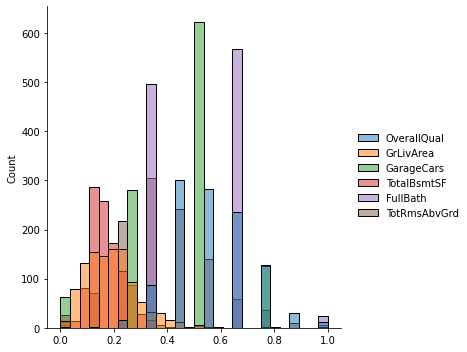

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

Come si vede il MinMaxScaler, basandosi sul massimo e sul minimo di ongi feature, ha il vantaggio di rendere ben paragonabili le scale delle features tra di loro. Potrebbe essere una buona scelta in questo caso, ma non è detto però che sia la scelta migliore in ogni caso. Queste features sono tutte positive, cioè non sono mai minori di zero. Ci sono spesso innvece contesti in cui alcune feature hanno anche valori minori di zero, e potrebbe essere una buona scelta quella di avere tutte le feature centrate sullo zero. A questo scopo per esempio si può usare lo StandardScaler.

#### StandardScaler()

Lo standard scaler si basa sulle deviazioni standard di ogni feature, e come si vede facilmente, le centra tutte attorno allo zero.

In [ ]:
#mette i dati tipicamente centrati sullo 0 e quindi sono paragonabili su un range che va da un numero 
#negativo ad un numero positivo), quindi non più da 0 a 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

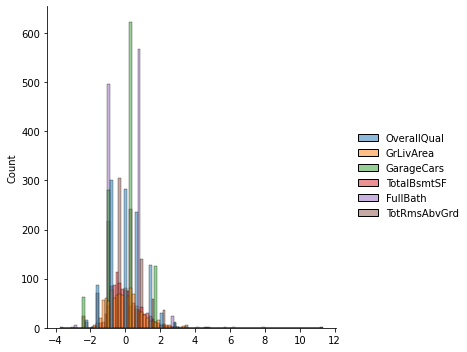

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

In [ ]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
model = model.fit(X_train_scaled, y_train)

In [ ]:
#ora abbiamo messo X_train_scaled    -> x scalato

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


TRAIN SET
MAE:  19303.105570776257
R2:  0.8548356001882977


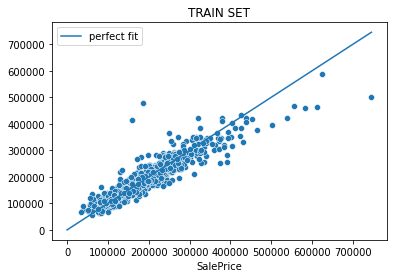

TEST SET
MAE:  22795.100821917807
R2:  0.8384879491201712


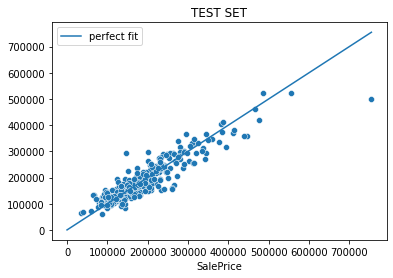

In [ ]:
### EVALUATION

train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

In [ ]:
#con lo scalato, il nostro modello è diventato sempre più accurato!

# DECISION TREE

In [ ]:
#che cos'é? 
#Modello non parametrico. non fa nessuna assunzione sulla struttura che potrebbero farei dati, è semplicemente una cascata di domande.
#gli alberi sono molto sensibili al training set e alle features
#si possono usare sia per la regressione che per la classificazione
#li si può usare per avere un'idea dell'importanza relativa delle feature.è un modo di capire quali sono le feature più importanti

#CONTRO: 
#tendono a fare molto overfitting. >Prima per evitare l'overfitting aumentavamo k.
#ora possiamo mettere max_depth. si 
#un singolo albero decisionale non è un buon predittore. diventa un buon predittore quando non è un solo albero -> RANDOM FOREST -> prende
#subset di feature randomizzati e pure di sample, per rendere il più possibile variegata la foresta.

TRAIN SET
MAE:  491.6500761035007
R2:  0.9986098393167883


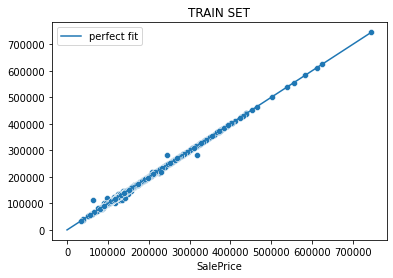

TEST SET
MAE:  28385.230593607303
R2:  0.7713262152333695


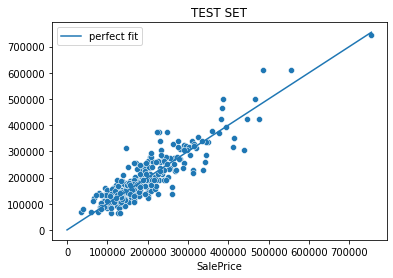

In [ ]:
from sklearn.tree import DecisionTreeRegressor

### FITTING

model = DecisionTreeRegressor()
model = model.fit(X=X_train, y=y_train)

### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

E' evidente che c'è dell'overfitting, perchè sul training set ho delle previsioni praticamente perfette, mentre sul test set va molto peggio.

Posso plottare le scelte dell'albero decisionale (conviene settare max_depth basso)

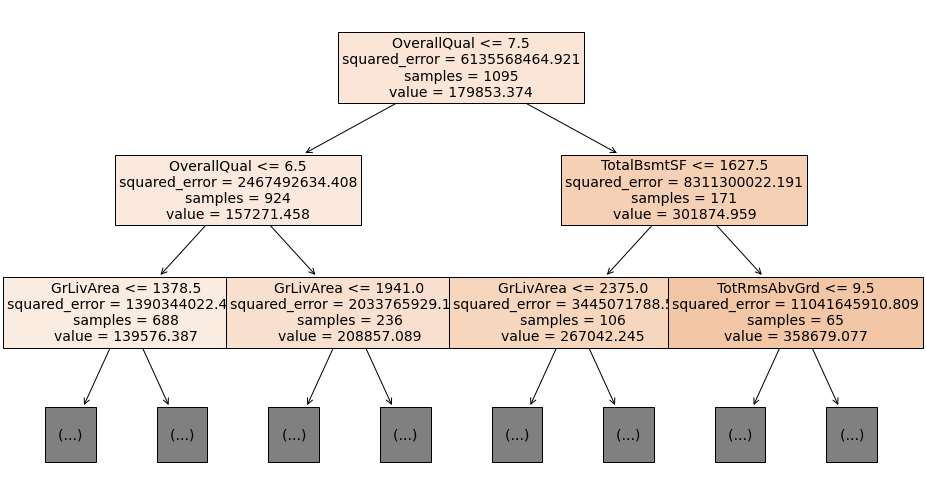

In [ ]:
from sklearn import tree
plt.figure(figsize=(16,9))
_ = tree.plot_tree(model, max_depth=2, filled=True, feature_names=list(X_train.columns), fontsize=14)
#stiamo decidendo quanto far plottare.
#mettiamo l'underscore perchè non vogliamo vedere quello che c'è scritto nell'ultima riga nel printing
#e non ho nessuna variabile assegnata. 

Posso anche ricavare l'importanza relativa delle feature. Gli alberi decisionali si usano in effetti anche in fase di Exploratory Data Analysis, quando si vuole capire quali sono le feature più importanti (fino ad ora avevamo usato solo le correlazioni)

### Features importance

In [ ]:
model.feature_importances_

array([0.59706478, 0.18898064, 0.02650241, 0.13734847, 0.0039679 ,
       0.0461358 ])

In [ ]:
pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

OverallQual     0.597065
GrLivArea       0.188981
TotalBsmtSF     0.137348
TotRmsAbvGrd    0.046136
GarageCars      0.026502
FullBath        0.003968
dtype: float64

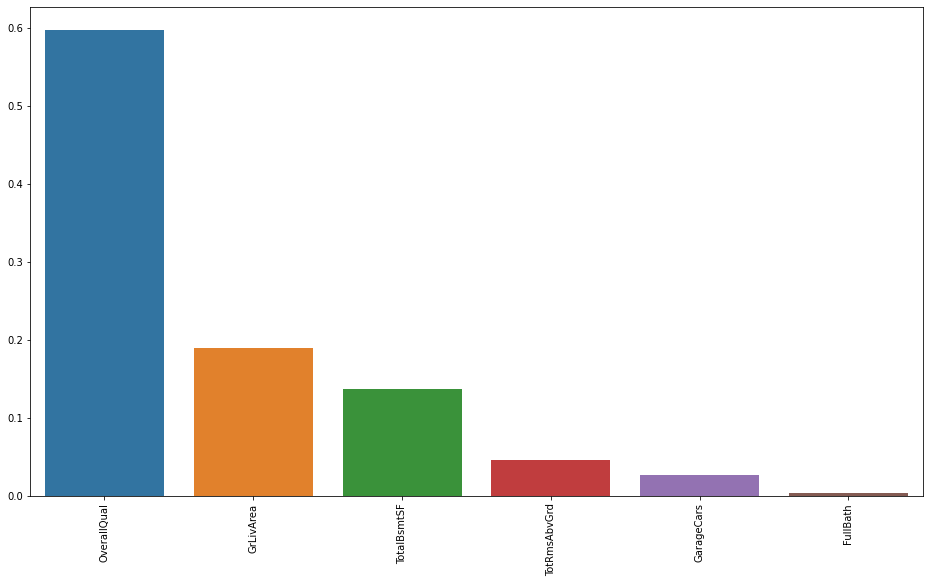

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

Proviamo a evitare l'overfitting limitando la max_depth dell'albero decisionale. Facciamo un ciclo su più valori. 
NB ci sarebbero tanti altri parametri su cui andare a lavorare ma noi ci limiteremo solo a max_depth

In [ ]:
#max_depth -> quando l'albero si ferma nel prendere decisioni.

### max_depth parameter

In [ ]:
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    
    print('\nMax_depth:',n)
    
    model = DecisionTreeRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  29270.21975592393
R2:  0.730334595971369
TEST SET
MAE:  30764.064659985288
R2:  0.7312838665785322

Max_depth: 4
TRAIN SET
MAE:  24378.56382544377
R2:  0.8192438074712409
TEST SET
MAE:  26660.63613719023
R2:  0.7981006708981189

Max_depth: 5
TRAIN SET
MAE:  21231.664855187322
R2:  0.8655144100379026
TEST SET
MAE:  23172.325620994605
R2:  0.855396454900917

Max_depth: 6
TRAIN SET
MAE:  18310.10230337116
R2:  0.8986616095038582
TEST SET
MAE:  23315.37144227897
R2:  0.8451020205829312

Max_depth: 7
TRAIN SET
MAE:  16142.613663086846
R2:  0.9210458884729397
TEST SET
MAE:  22786.59369809599
R2:  0.8441481009085479

Max_depth: 8
TRAIN SET
MAE:  13217.368592253477
R2:  0.9402291991165947
TEST SET
MAE:  24491.8883598179
R2:  0.814918788754548

Max_depth: 9
TRAIN SET
MAE:  11204.878075864055
R2:  0.95415500731588
TEST SET
MAE:  25498.17064960879
R2:  0.8010025766166124

Max_depth: 10
TRAIN SET
MAE:  8496.90391342029
R2:  0.9699074046201834
TEST SET
MAE:  25460.4649

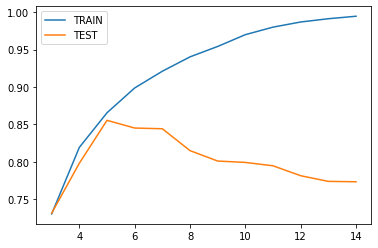

In [ ]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

E' evidente come all'aumentare di max_depth (e quindi della complessità del modello) aumenti anche l'overfitting, cioè la distanza tra le performance di training e di test. Potremmo usare mex_depth=5, dove c'è il massimo sul test set.
Il problema dell'overfitting si può in parte risolvere usando un ensable di alberi decisionali: le Random Forest

In [ ]:
#0,85 di r2

In [ ]:
#all'aum di max_depht l'r2 aum, ma aumenta anche il rischio di overfitting

# RANDOM FOREST

TRAIN SET
MAE:  8614.432519916714
R2:  0.9678962332388322


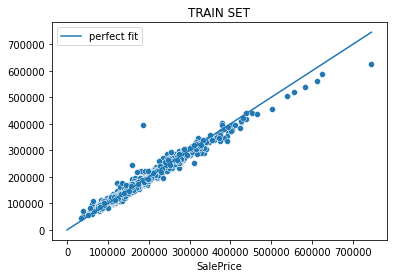

TEST SET
MAE:  21039.659232529266
R2:  0.871387209169263


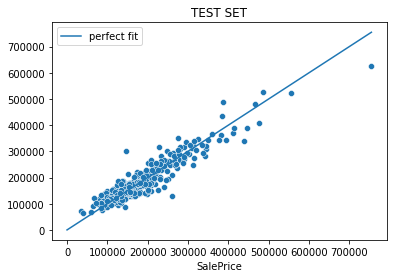

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### FITTING
model = RandomForestRegressor()
model = model.fit(X=X_train, y=y_train)

### EVALUATION
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

Senza settare alcun parametro già l'overiftting, seppure ancora presente, è molto meno pronunciato rispetto all'albero decisinoale.

Anche qui posso ricavare l'importanza relativa delle feature

### Features importance

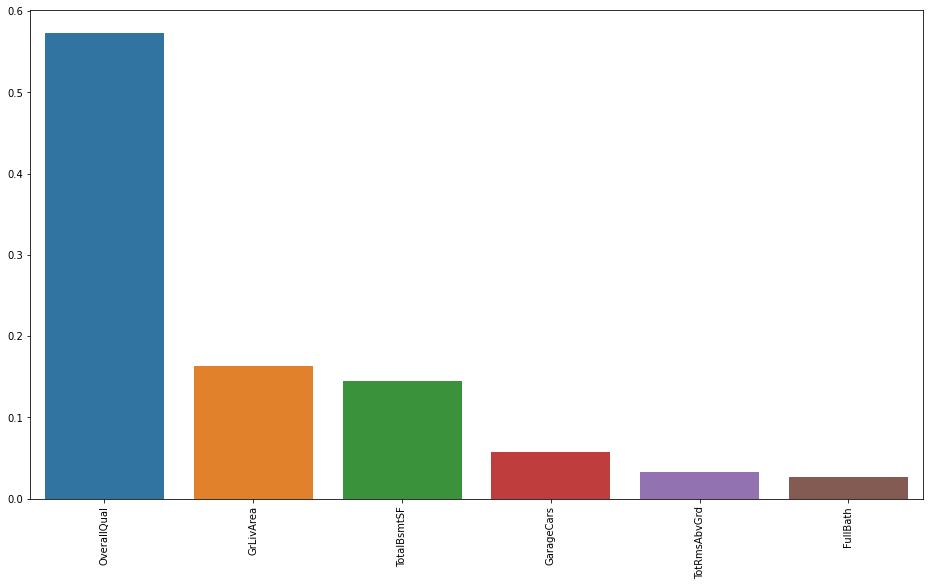

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

### max_depth parameter

Facendo lo stesso lavoro di prima possiamo fare un primo tuning del parametro max_depth

In [ ]:
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    print('\nMax_depth:',n)
    model = RandomForestRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  24158.827136872653
R2:  0.795219468118873
TEST SET
MAE:  24387.26702545277
R2:  0.8078155292997797

Max_depth: 4
TRAIN SET
MAE:  21134.321700987908
R2:  0.8510645776707894
TEST SET
MAE:  21608.76156438684
R2:  0.8482291682653222

Max_depth: 5
TRAIN SET
MAE:  18977.658471088733
R2:  0.8814248202341445
TEST SET
MAE:  20206.00603692822
R2:  0.8687077150425963

Max_depth: 6
TRAIN SET
MAE:  17128.499021631214
R2:  0.9071397913965091
TEST SET
MAE:  19840.10629347884
R2:  0.879708895874621

Max_depth: 7
TRAIN SET
MAE:  15565.09279794663
R2:  0.923722871429588
TEST SET
MAE:  20209.89802867642
R2:  0.8761491749054493

Max_depth: 8
TRAIN SET
MAE:  14051.54858490689
R2:  0.9362563555907246
TEST SET
MAE:  20056.70111423971
R2:  0.8832583527328436

Max_depth: 9
TRAIN SET
MAE:  12645.238793224024
R2:  0.9494194513338142
TEST SET
MAE:  20483.134690306426
R2:  0.8751953876574954

Max_depth: 10
TRAIN SET
MAE:  11521.124172354286
R2:  0.9554029160415602
TEST SET
MAE:  20275

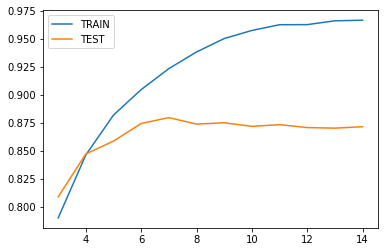

In [ ]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

Possiamo scegliere di usare max_depth = 5, dove c'è il picco di performance sul test set

In [ ]:
#overfitting -> quando funziona troppo bene sulle cose su cui l'abbiamo allenato rispetto a quello che non ha ancora visto.

In [ ]:
#RANDOM FOREST -> uno dei migliori modellil di predizione in assuluto.

In [ ]:
#non ha solo max_depth come parametro, ma ne ha molti altri. 